<h1>Backtest a technical indicator

<h3>Install the necessary packages

In [24]:
! pip install python-binance

In [25]:
! pip install ta

<h3>Import the necessary libraries

In [1]:
import pandas as pd
from binance.client import Client
import ta
import numpy as np
import matplotlib.pyplot as plt

<h3>Import data from binance

In [2]:
historicalData = Client().get_historical_klines("BTCUSDT",Client.KLINE_INTERVAL_1HOUR,"01 January 2017")
data = pd.DataFrame(historicalData, columns = ['timestamp', 'open','high','low','close','volume','close_time','quote_av','trades','tb_base_av','tb_quote_av','ignore'])

<h3> Manipulate the data

<h4> Select the usefull data

In [3]:
data['close'] = pd.to_numeric(data['close'])
data['SMA200'] = ta.trend.sma_indicator(data['close'], 200)
data['SMA600'] = ta.trend.sma_indicator(data['close'], 600)

<h4> Use the Timestamp as an index

In [4]:
data_used = data[['close','SMA200', 'SMA600']].set_index(data['timestamp'])
data_used.index = pd.to_datetime(data_used.index, unit = 'ms')
data_used.head()

,close,SMA200,SMA600
timestamp,,,
2017-08-17 04:00:00,4308.83,NaN,NaN
2017-08-17 05:00:00,4315.32,NaN,NaN
2017-08-17 06:00:00,4324.35,NaN,NaN
2017-08-17 07:00:00,4349.99,NaN,NaN
2017-08-17 08:00:00,4360.69,NaN,NaN


<h3> Implement the trading strategy based on moving average

In [6]:
# Start with 1000 USDT and 0 BTC

usdt = 1000
btc = 0
lastIndex = data_used.first_valid_index()
dates = []
price = []
Long = 0
Short = 0

for index, row in data_used.iterrows() :
    # Buy when SMA_200 > SMA_600
    if data_used['SMA200'][lastIndex] > data_used['SMA600'][lastIndex] and usdt > 10 :
        btc = usdt / data_used['close'][index]
        btc = btc - 0.0007 * btc  
        usdt = 0
        
        #print("Buy the bitcoin ", data_used['close'][index],'$ at', index)
        dates.append(index)
        price.append(data_used['close'][index])
        Long+=1

    # Sell when SMA_200 < SMA_600    
    if data_used['SMA200'][lastIndex] < data_used['SMA600'][lastIndex] and btc > 0.0001 :
        usdt = btc * data_used['close'][index]
        usdt = usdt - 0.0007 * usdt 
        btc = 0
        
        #print("Sell the bitcoin ", data_used['close'][index],'$ at', index)
        
        dates.append(index)
        price.append(data_used['close'][index])
        Short+=1
    
    lastIndex = index

print("\nThe number of Long :",Long)
print("\nThe number of Short :",Short)


The number of Long : 41

The number of Short : 41


<h3> The total win obtained with this strategy

In [8]:
finalResult = usdt + btc * data_used['close'].iloc[-1] 
print("Final Result :",finalResult,'USDT')

Final Result : 21908.049694888734 USDT


<h3>The win obtained if we buy the Bitcoin at the first date and sell at the last date

In [9]:
print("Final Result :", (1000 / data_used['close'].iloc[0]) * data_used['close'].iloc[-1],'USDT')

Final Result : 5078.341452320004 USDT


<h3> The growth of Bitcoins

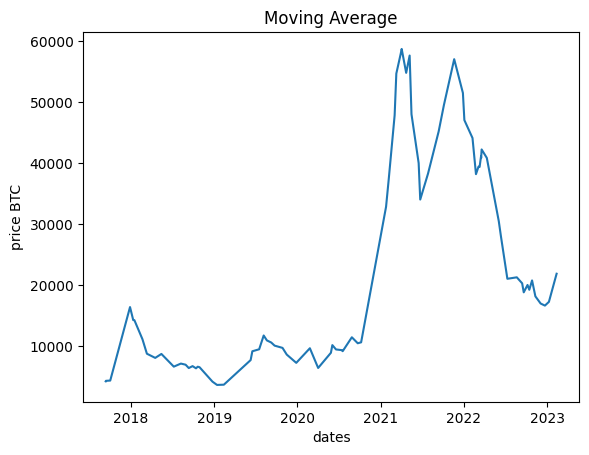

In [10]:
plt.title("Moving Average")
plt.xlabel("dates")
plt.ylabel("price BTC")

plt.plot(dates,price)
plt.show()